# Food Desert Definition Analysis

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import altair as alt
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from dataprocessing import get_blockgroup_data, get_blockgroupshape

In [3]:
df = get_blockgroup_data()
gdf = get_blockgroupshape()

In [5]:
df['Low Income'] = np.where(df['Percent Poverty Level'] >= 0.2, 1, 0)

## Initial Exploration

EDA graphs

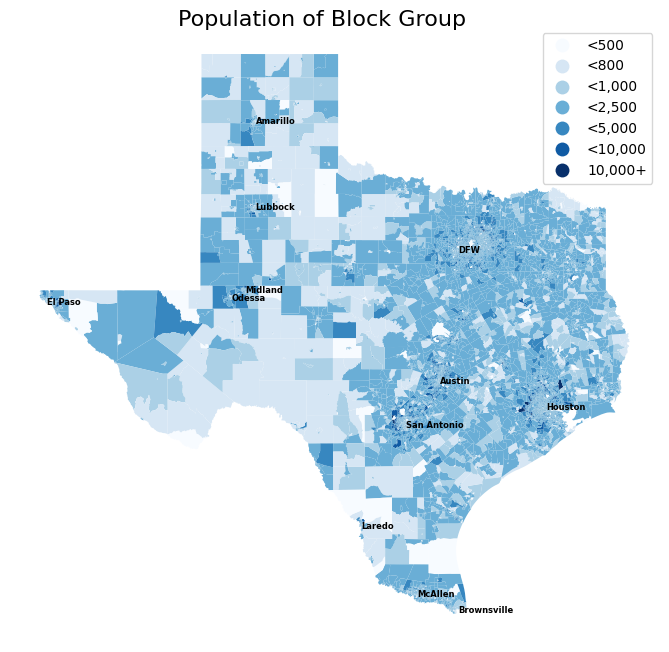

In [16]:
bins = [0, 500, 800, 1000, 2500, 5000, 10000,  np.inf]
labels = ['<500', '<800', '<1,000', '<2,500', '<5,000', '<10,000', '10,000+']
df['Population Bins'] = pd.cut(df['Total Population'], bins=bins, labels=labels)

df_geo = gpd.GeoDataFrame(df, geometry='geometry')

fig, ax = plt.subplots(figsize=(10,8))
df_geo.plot(column='Population Bins', cmap='Blues', legend=True, ax=ax)
ax.set_axis_off()

# adding big cities
texas_cities = {
    'Houston': (-95.3698, 29.7604),
    'DFW': (-97.3308, 32.7555),
    'Austin': (-97.7431, 30.2672),
    'San Antonio': (-98.4936, 29.4241),
    'El Paso': (-106.4850, 31.7619),
    'Laredo': (-99.4803, 27.5036),
    'Brownsville': (-97.3208, 25.9017),
    'McAllen': (-98.2360, 26.2034),
    'Amarillo': (-101.8313, 35.2219),
    'Lubbock': (-101.8552, 33.5779),
    'Odessa': (-102.3676, 31.8457),
    'Midland': (-102.0779, 32.0000)}

for city, (lon, lat) in texas_cities.items():
    ax.text(lon, lat, city,
            fontsize=6,
            fontweight='bold',
            color='black',
            ha='left',
            va='center', 
            bbox=dict(facecolor='none', edgecolor='none', alpha=0.4))

fig.suptitle('Population of Block Group', fontsize=16, y=0.9)

plt.savefig(fname='images/Population.png', dpi = 150)
plt.savefig(fname='images/Populationtransparent.png', dpi = 150, transparent=True)

plt.show()

## USDA Definition Analysis

In [11]:
# low_access flag:
df['USDA Low Access'] = (
    ((df['Classification'] == 'Urban') & (df['Distance_mi'] > 1)) |
    ((df['Classification'] == 'Rural') & (df['Distance_mi'] > 10))).astype(int)
# USDA definition flag
df['USDA Food Desert'] = ((df['Low Income'] == 1) & (df['USDA Low Access'] == 1)).astype(int)

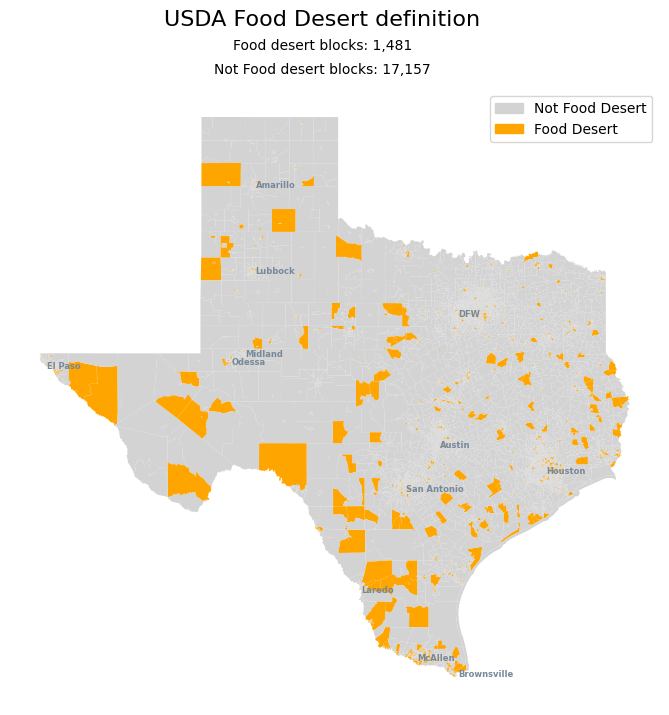

In [15]:
FD_cnt = (df['USDA Food Desert'] == 1).sum()
NFD_cnt =  (df['USDA Food Desert'] == 0).sum()

# converting  USDA_def to a GeoDataFrame 
USDA_def = gpd.GeoDataFrame(df, geometry='geometry')

fig, ax = plt.subplots(figsize=(10, 8))
cmap = ListedColormap(['lightgray', 'orange'])  # green for 0, lightcoral (red) for 1

USDA_def.plot(column='USDA Food Desert', cmap=cmap, legend=False, ax=ax)
ax.set_axis_off()

# create custom legends using patches 
not_fd_patch = mpatches.Patch(color='lightgray', label='Not Food Desert')
fd_patch = mpatches.Patch(color='orange', label='Food Desert')

plt.legend(handles=[not_fd_patch, fd_patch], loc='upper right')

# adding big cities
texas_cities = {
    'Houston': (-95.3698, 29.7604),
    'DFW': (-97.3308, 32.7555),
    'Austin': (-97.7431, 30.2672),
    'San Antonio': (-98.4936, 29.4241),
    'El Paso': (-106.4850, 31.7619),
    'Laredo': (-99.4803, 27.5036),
    'Brownsville': (-97.3208, 25.9017),
    'McAllen': (-98.2360, 26.2034),
    'Amarillo': (-101.8313, 35.2219),
    'Lubbock': (-101.8552, 33.5779),
    'Odessa': (-102.3676, 31.8457),
    'Midland': (-102.0779, 32.0000)}

for city, (lon, lat) in texas_cities.items():
    ax.text(lon, lat, city,
            fontsize=6,
            fontweight='bold',
            color='lightslategray',
            ha='left',
            va='center', 
            bbox=dict(facecolor='none', edgecolor='none', alpha=0.4))

fig.suptitle('USDA Food Desert definition', fontsize=16, y=0.98)
fig.text(0.5, 0.93, f'Food desert blocks: {FD_cnt:,}', ha='center', fontsize=10)
fig.text(0.5, 0.90, f'Not Food desert blocks: {NFD_cnt:,}', ha='center', fontsize=10)

plt.savefig(fname='images/USDA.png', dpi = 150)
plt.savefig(fname='images/USDAtransparent.png', dpi = 150, transparent=True)

plt.show()

## CDC Definition Analysis

In [17]:
df['Food Desert CDC'] = np.where(df['Distance_mi'] > 0.5 + df['maxradius'], 1, 0)

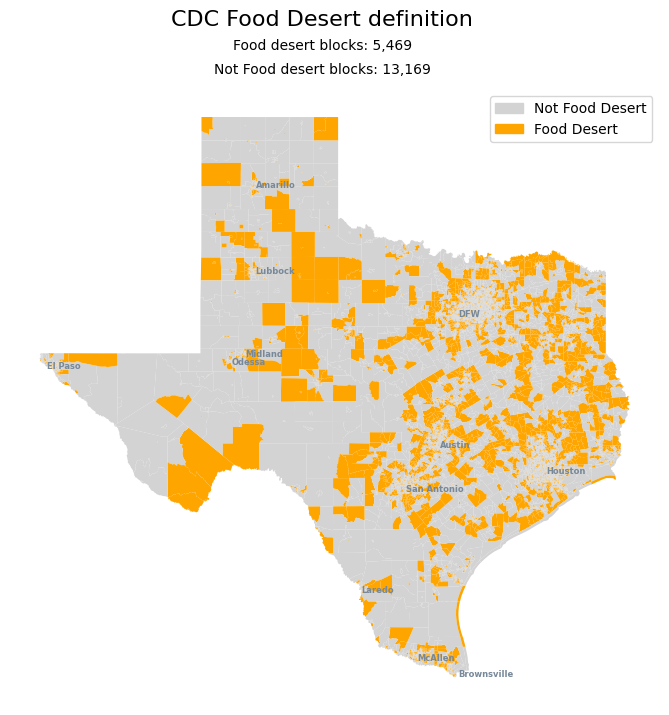

In [ ]:
## CDC Definition
df_geo = gpd.GeoDataFrame(df, geometry='geometry')
fig, ax = plt.subplots(figsize=(10, 8))
cmap = ListedColormap(['lightgray', 'orange'])

df_geo.plot(column='Food Desert CDC', cmap=cmap, legend=False, ax=ax)
ax.set_axis_off()

# custom legends
not_fd_patch = mpatches.Patch(color='lightgray', label='Not Food Desert')
fd_patch = mpatches.Patch(color='orange', label='Food Desert')

plt.legend(handles=[not_fd_patch, fd_patch], loc='upper right')

FD_cnt = (df['Food Desert CDC'] == 1).sum()
NFD_cnt =  (df['Food Desert CDC'] == 0).sum()

# adding big cities
texas_cities = {
    'Houston': (-95.3698, 29.7604),
    'DFW': (-97.3308, 32.7555),
    'Austin': (-97.7431, 30.2672),
    'San Antonio': (-98.4936, 29.4241),
    'El Paso': (-106.4850, 31.7619),
    'Laredo': (-99.4803, 27.5036),
    'Brownsville': (-97.3208, 25.9017),
    'McAllen': (-98.2360, 26.2034),
    'Amarillo': (-101.8313, 35.2219),
    'Lubbock': (-101.8552, 33.5779),
    'Odessa': (-102.3676, 31.8457),
    'Midland': (-102.0779, 32.0000)}

for city, (lon, lat) in texas_cities.items():
    ax.text(lon, lat, city,
            fontsize=6,
            fontweight='bold',
            color='lightslategray',
            ha='left',
            va='center', 
            bbox=dict(facecolor='none', edgecolor='none', alpha=0.4))

fig.suptitle('CDC Food Desert definition', fontsize=16, y=0.98)
fig.text(0.5, 0.93, f'Food desert blocks: {FD_cnt:,}', ha='center', fontsize=10)
fig.text(0.5, 0.90, f'Not Food desert blocks: {NFD_cnt:,}', ha='center', fontsize=10)

plt.savefig(fname='images/CDC.png', dpi = 150)
plt.savefig(fname='images/CDCtransparent.png', dpi = 150, transparent=True)

plt.show()

## USDA with Vehicle Analysis

In [19]:
df['Low Access - Vehicle'] = np.where(((df['Percent No Vehicle Access'] > 0.1) & (df['Distance_mi'] > 0.05)) | (df['Distance_mi'] > 20), 1, 0)
df['Food Desert USDA Vehicle'] = np.where((df['Low Income']==1) & (df['Low Access - Vehicle']==1), 1, 0)

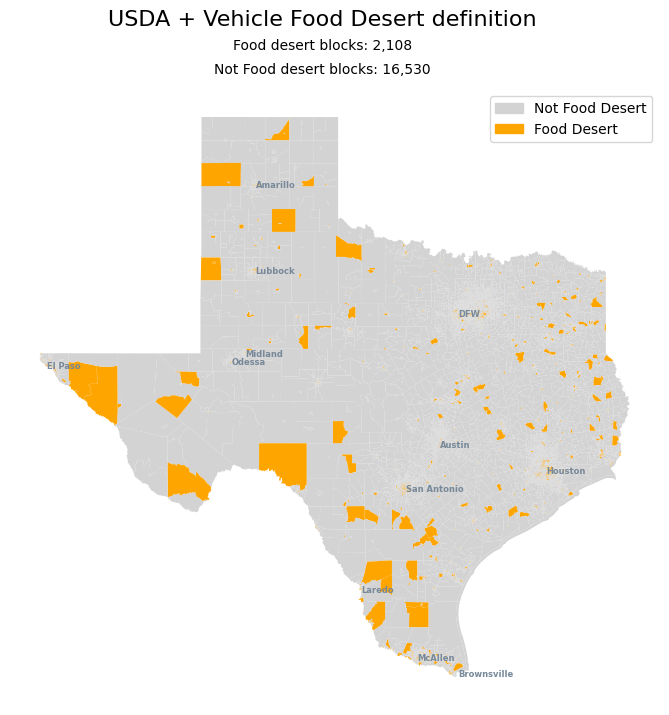

In [ ]:
## USDA with Vehicle Access
df_geo = gpd.GeoDataFrame(df, geometry='geometry')

fig, ax = plt.subplots(figsize=(10, 8))
cmap = ListedColormap(['lightgray', 'orange'])

df_geo.plot(column='Food Desert USDA Vehicle', cmap=cmap, legend=False, ax=ax)
ax.set_axis_off()

# custom legends
not_fd_patch = mpatches.Patch(color='lightgray', label='Not Food Desert')
fd_patch = mpatches.Patch(color='orange', label='Food Desert')

plt.legend(handles=[not_fd_patch, fd_patch], loc='upper right')

FD_cnt = (df['Food Desert USDA Vehicle'] == 1).sum()
NFD_cnt =  (df['Food Desert USDA Vehicle'] == 0).sum()

# adding big cities
texas_cities = {
    'Houston': (-95.3698, 29.7604),
    'DFW': (-97.3308, 32.7555),
    'Austin': (-97.7431, 30.2672),
    'San Antonio': (-98.4936, 29.4241),
    'El Paso': (-106.4850, 31.7619),
    'Laredo': (-99.4803, 27.5036),
    'Brownsville': (-97.3208, 25.9017),
    'McAllen': (-98.2360, 26.2034),
    'Amarillo': (-101.8313, 35.2219),
    'Lubbock': (-101.8552, 33.5779),
    'Odessa': (-102.3676, 31.8457),
    'Midland': (-102.0779, 32.0000)}

for city, (lon, lat) in texas_cities.items():
    ax.text(lon, lat, city,
            fontsize=6,
            fontweight='bold',
            color='lightslategray',
            ha='left',
            va='center', 
            bbox=dict(facecolor='none', edgecolor='none', alpha=0.4))

fig.suptitle('USDA + Vehicle Food Desert definition', fontsize=16, y=0.98)
fig.text(0.5, 0.93, f'Food desert blocks: {FD_cnt:,}', ha='center', fontsize=10)
fig.text(0.5, 0.90, f'Not Food desert blocks: {NFD_cnt:,}', ha='center', fontsize=10)

plt.savefig(fname='images/USDAVehicle.png', dpi = 150)
plt.savefig(fname='images/USDAVehicletransparent.png', dpi = 150, transparent=True)

plt.show()

## Food Swamp Analysis

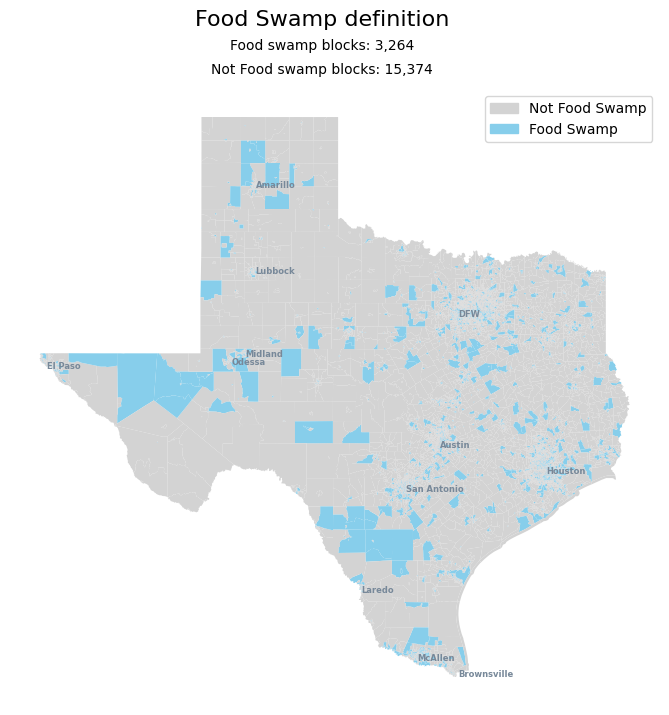

In [11]:
## Food Swamp
df_geo = gpd.GeoDataFrame(df, geometry='geometry')

fig, ax = plt.subplots(figsize=(10, 8))
cmap = ListedColormap(['lightgray', '#87ceeb'])

df_geo.plot(column='food_swamp_flag', cmap=cmap, legend=False, ax=ax)
ax.set_axis_off()

# custom legends
not_fd_patch = mpatches.Patch(color='lightgray', label='Not Food Swamp')
fd_patch = mpatches.Patch(color='#87ceeb', label='Food Swamp')

plt.legend(handles=[not_fd_patch, fd_patch], loc='upper right')

FS_cnt = (df['food_swamp_flag'] == 1).sum()
NFS_cnt =  (df['food_swamp_flag'] == 0).sum()

# adding big cities
texas_cities = {
    'Houston': (-95.3698, 29.7604),
    'DFW': (-97.3308, 32.7555),
    'Austin': (-97.7431, 30.2672),
    'San Antonio': (-98.4936, 29.4241),
    'El Paso': (-106.4850, 31.7619),
    'Laredo': (-99.4803, 27.5036),
    'Brownsville': (-97.3208, 25.9017),
    'McAllen': (-98.2360, 26.2034),
    'Amarillo': (-101.8313, 35.2219),
    'Lubbock': (-101.8552, 33.5779),
    'Odessa': (-102.3676, 31.8457),
    'Midland': (-102.0779, 32.0000)}

for city, (lon, lat) in texas_cities.items():
    ax.text(lon, lat, city,
            fontsize=6,
            fontweight='bold',
            color='lightslategray',
            ha='left',
            va='center', 
            bbox=dict(facecolor='none', edgecolor='none', alpha=0.4))

fig.suptitle('Food Swamp definition', fontsize=16, y=0.98)
fig.text(0.5, 0.93, f'Food swamp blocks: {FS_cnt:,}', ha='center', fontsize=10)
fig.text(0.5, 0.90, f'Not Food swamp blocks: {NFS_cnt:,}', ha='center', fontsize=10)

plt.savefig(fname='images/FoodSwamp.png', dpi = 150)
plt.savefig(fname='images/FoodSwamptransparent.png', dpi = 150, transparent=True)

plt.show()

## Proposed Definition Analysis

Bar chart showing percent of test region designated as a food desert for each tested method<br>
Consensus map highlighting areas consistently identified in all methods